## Gestión y procesamiento de base de datos y nociones de auditoría no presencial

----

#### Escuela de Negocios y Administración Pública
#### Facultad de Ciencias Económicas - Universidad de Buenos Aires

----

#### Esp. Cr. Alberto Falco

### 1. Lectura y análisis inicial

In [1]:
# Gestión y procesamiento de base de datos y nociones de auditoría no presencial
# ---------------------------------------------------------------------------------------------
# Escuela de Negocios y Administración Pública
# Facultad de Ciencias Económicas - Universidad de Buenos Aires
# ---------------------------------------------------------------------------------------------
# Esp. Cr. Alberto Falco

In [2]:
# Instalación de liberías.

In [3]:
# Importación de liberías.
import pandas as pd
import numpy as np

In [4]:
# Lectura del archivo csv.
df = pd.read_csv("database_combined.csv", dtype={"Customer ID":"object",
                                                 "Age":"Int64",
                                                 "Contact Number":"object",
                                                 "TransactionID":"object"})
df.head()

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,Account Balance,Date Of Account Opening,Last Transaction Date,TransactionID,Transaction Date,Transaction Type,Transaction Amount,Account Balance After Transaction,Label
0,1,Joshua,Hall,45,Male,Address_1,Fort Worth,19458794854,joshua.hall@kag.com,Current,1313.38,5/26/2006,4/23/2023,1,12/7/2023,Withdrawal,1457.61,2770.99,0
1,2,Mark,Taylor,47,Female,Address_2,Louisville,19458794855,mark.taylor@kag.com,Current,5988.46,3/2/2006,1/27/2023,2,4/27/2023,Deposit,1660.99,7649.45,0
2,3,Joseph,Flores,25,Female,Address_3,Philadelphia,19458794856,joseph.flores@kag.com,Current,8277.88,7/19/2015,1/1/2023,3,4/5/2023,Deposit,839.91,7437.97,0
3,4,Kevin,Lee,52,Other,Address_4,Oklahoma City,19458794857,kevin.lee@kag.com,Savings,7487.21,1/30/2008,8/2/2023,4,7/28/2023,Withdrawal,4908.89,12396.10,0
4,5,Linda,Johnson,68,Other,Address_5,Phoenix,19458794858,linda.johnson@kag.com,Savings,6993.55,5/25/2021,3/27/2023,5,1/16/2023,Transfer,589.07,6404.48,0


In [5]:
# Lectura de registros con label = 1.
df[df["Label"] == 1]

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,Account Balance,Date Of Account Opening,Last Transaction Date,TransactionID,Transaction Date,Transaction Type,Transaction Amount,Account Balance After Transaction,Label
8,9,Daniel,Moore,52,Male,Address_9,Indianapolis,NaN,daniel.moore@kag.com,Current,1109.30,NaN,11/5/2023,NaN,9/28/2023,Withdrawal,2036.771813,340.74,1
12,13,Margaret,Robinson,63,Female,Address_13,Columbus,19458794866,margaret.robinson@kag.com,Savings,5402.04,NaN,11/21/2023,13,12/2/2023,Deposit,3070.580000,NaN,1
23,24,Holly,NaN,30,Female,Address_24,San Antonio,19458794877,charles.adams@kag.com,Savings,3616.88,NaN,8/10/2023,24,1/25/2023,Deposit,4395.730000,8012.61,1
26,27,Lisa,Wilson,61,NaN,Address_27,NaN,19458794880,lisa.wilson@kag.com,Savings,NaN,7/27/2006,12/31/2023,27,NaN,Withdrawal,1594.080000,3767.44,1
33,34,Jessica,Davis,56,Other,Address_34,Oklahoma City,19458794887,jessica.davis@kag.com,NaN,6439.03,8/23/2005,9/7/2023,34,12/11/2023,Transfer,4135.400000,10574.43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,4918,Nancy,Torres,28,Female,Address_4918,Phoenix,19458799771,nancy.torres@kag.com,Current,8945.14,12/24/2004,9/23/2023,NaN,4/19/2023,Transfer,3445.120000,5500.02,1
4923,4924,Susan,Nelson,30,Female,Address_4924,Houston,19458799777,susan.nelson@kag.com,Current,8586.29,3/18/2005,NaN,4924,3/30/2023,Withdrawal,NaN,5084.72,1
4966,4967,Carol,Sanchez,35,Male,Address_4967,Phoenix,19458799820,carol.sanchez@kag.com,NaN,NaN,1/19/2010,NaN,4967,12/6/2023,Withdrawal,1191.320000,10271.99,1
4975,4976,Andrew,Mitchell,47,Male,NaN,Omaha,19458799829,andrew.mitchell@kag.com,Current,6690.69,2/25/2003,10/8/2023,4976,10/16/2018,Deposit,3550.010000,3140.68,1


In [6]:
# Control de tipos de datos.
df.dtypes

,0
Customer ID,object
First Name,object
Last Name,object
Age,Int64
Gender,object
Address,object
City,object
Contact Number,object
Email,object
Account Type,object


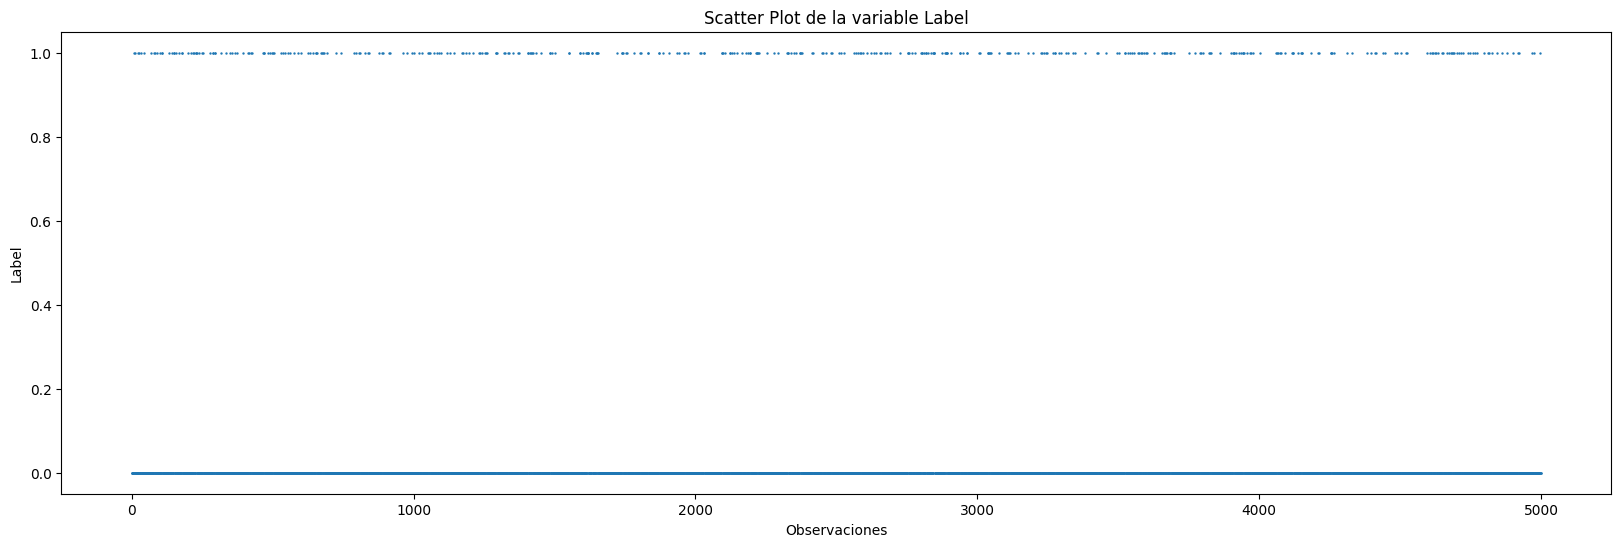

In [7]:
# Scatter plot para verificar la distribución de frecuencias de la variable Label dentro del dataset.
# El eje X lo constituye cada uno de los 5000 registros.
# El eje Y adquiere valores 0 o 1 dependiendo del atributo "Label".

# Importación de librerias.
import matplotlib.pyplot as plt

# Scatterplot.
plt.figure(figsize=(20, 6))  # Modifica el tamaño de la figura.
plt.scatter(range(len(df)), df['Label'], s=0.5)  # "s" controla el tamaño de los marcadores o puntos.
plt.xlabel('Observaciones')
plt.ylabel('Label')
plt.title('Scatter Plot de la variable Label')
plt.show()

### 2. Preprocesamiento

In [8]:
# Copia del data frame para preprocesamiento.
df_preprocessed = df.copy()

In [9]:
# Recuento de valores únicos por atributo.
for col in df_preprocessed.columns:
  print(col, ":", df_preprocessed[col].nunique())

Customer ID : 4956
First Name : 74
Last Name : 74
Age : 65
Gender : 3
Address : 4962
City : 74
Contact Number : 4952
Email : 2180
Account Type : 2
Account Balance : 4939
Date Of Account Opening : 3710
Last Transaction Date : 365
TransactionID : 4927
Transaction Date : 400
Transaction Type : 3
Transaction Amount : 4925
Account Balance After Transaction : 4936
Label : 2


In [10]:
# Asignación de valores 1 y 0 para atributos no numéricos con posibles valores superiores a 10.
for col in df_preprocessed.columns:
  if pd.api.types.is_numeric_dtype(df_preprocessed[col]) or df_preprocessed[col].nunique() < 10:
    continue
  else:
    df_preprocessed[col] = df_preprocessed[col].apply(lambda x: 1 if pd.isna(x) or x == '' or str(x).strip() == "" else 0)

In [14]:
# Análisis de atributos para encoding.
for col in df_preprocessed.columns:
  if not(pd.api.types.is_numeric_dtype(df_preprocessed[col])) and df_preprocessed[col].nunique() < 10:
    print(df_preprocessed[col].value_counts(dropna=False), end="\n\n")
  else:
    continue

Gender
Female    1709
Other     1628
Male      1620
NaN         43
Name: count, dtype: int64

Account Type
Savings    2480
Current    2466
NaN          54
Name: count, dtype: int64

Transaction Type
Deposit       1682
Withdrawal    1665
Transfer      1614
NaN             39
Name: count, dtype: int64



In [15]:
# Dtypes del data frame.
df_preprocessed.dtypes

,0
Customer ID,int64
First Name,int64
Last Name,int64
Age,Int64
Gender,object
Address,int64
City,int64
Contact Number,int64
Email,int64
Account Type,object


In [16]:
# Head del data frame.
df_preprocessed.head()

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,Account Balance,Date Of Account Opening,Last Transaction Date,TransactionID,Transaction Date,Transaction Type,Transaction Amount,Account Balance After Transaction,Label
0,0,0,0,45,Male,0,0,0,0,Current,1313.38,0,0,0,0,Withdrawal,1457.61,2770.99,0
1,0,0,0,47,Female,0,0,0,0,Current,5988.46,0,0,0,0,Deposit,1660.99,7649.45,0
2,0,0,0,25,Female,0,0,0,0,Current,8277.88,0,0,0,0,Deposit,839.91,7437.97,0
3,0,0,0,52,Other,0,0,0,0,Savings,7487.21,0,0,0,0,Withdrawal,4908.89,12396.10,0
4,0,0,0,68,Other,0,0,0,0,Savings,6993.55,0,0,0,0,Transfer,589.07,6404.48,0


### 3. Ingeniería de predictores

In [18]:
# Aplicación de one-hot encoding y estandarización de variables predictoras.
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Definición de variables a transformar o no.
passthrough_cols = ['Customer ID', 'First Name', 'Last Name', 'Address', 'City',
                    'Contact Number', 'Email', 'Date Of Account Opening',
                    'Last Transaction Date', 'TransactionID', 'Transaction Date']
numerical_cols = ['Age', 'Account Balance', 'Transaction Amount', 'Account Balance After Transaction']
categorical_cols = ['Gender',  'Account Type', 'Transaction Type']

# Creación del objeto ColumnTransformer.
col_transformer = ColumnTransformer(
    transformers=[
        ('passthrough', 'passthrough', passthrough_cols),
        ('numerical', StandardScaler(), numerical_cols),
        ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='drop'
)

# Test de transformaciones.
print("Primera fila del dataset transformado:", end="\n\n")
print(col_transformer.fit_transform(df_preprocessed)[0:1], end="\n\n")
print("Shape del dataset:", col_transformer.fit_transform(df_preprocessed).shape, end="\n\n")
print("Atributos del dataset transformado:", end="\n\n")
print(col_transformer.get_feature_names_out(), end="\n\n")

Primera fila del dataset transformado:

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.09457357
  -1.31679455 -0.72628943 -0.55894717  0.          1.          0.
   0.          1.          0.          0.          0.          0.
   1.          0.        ]]

Shape del dataset: (5000, 26)

Atributos del dataset transformado:

['passthrough__Customer ID' 'passthrough__First Name'
 'passthrough__Last Name' 'passthrough__Address' 'passthrough__City'
 'passthrough__Contact Number' 'passthrough__Email'
 'passthrough__Date Of Account Opening'
 'passthrough__Last Transaction Date' 'passthrough__TransactionID'
 'passthrough__Transaction Date' 'numerical__Age'
 'numerical__Account Balance' 'numerical__Transaction Amount'
 'numerical__Account Balance After Transaction'
 'categorical__Gender_Female' 'categorical__Gender_Male'
 'categorical__Gender_Other' 'categorical__Gender_nan'
 'categorical__Account Type_Current' 

### 4. Entrenamiento

In [19]:
# Head del data frame preprocesado.
df_preprocessed.head()

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,Account Balance,Date Of Account Opening,Last Transaction Date,TransactionID,Transaction Date,Transaction Type,Transaction Amount,Account Balance After Transaction,Label
0,0,0,0,45,Male,0,0,0,0,Current,1313.38,0,0,0,0,Withdrawal,1457.61,2770.99,0
1,0,0,0,47,Female,0,0,0,0,Current,5988.46,0,0,0,0,Deposit,1660.99,7649.45,0
2,0,0,0,25,Female,0,0,0,0,Current,8277.88,0,0,0,0,Deposit,839.91,7437.97,0
3,0,0,0,52,Other,0,0,0,0,Savings,7487.21,0,0,0,0,Withdrawal,4908.89,12396.10,0
4,0,0,0,68,Other,0,0,0,0,Savings,6993.55,0,0,0,0,Transfer,589.07,6404.48,0


In [20]:
# División del set de datos en dos conjuntos: entrenamiento y prueba.
# El set de entrenamiento tendrá el 80% de las observaciones.
# El set de prueba tendrá el 20% restante para evaluar el desempeño de los modelos.
# Supuesto: no existe autocorrelación o correlación serial entre las observaciones. En otras palabras, se supone que no existe dependencia entre observaciones sucesivas o cercanas entre sí.
# Este supuesto permite hacer una partición aleatoria del set de datos, ya sea para prueba como para validación cruzada.

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_preprocessed, random_state=42, stratify=df_preprocessed["Label"], test_size=0.2)

In [21]:
# Control de distribución de registros anómalos.
print(df_train["Label"].value_counts(), end="\n\n")
print(df_test["Label"].value_counts())

Label
0    3666
1     334
Name: count, dtype: int64

Label
0    917
1     83
Name: count, dtype: int64


In [22]:
# Obtención de atributos (X) y clases (y)
X_train, y_train = df_train.drop(columns=["Label"]), df_train["Label"]
X_test, y_test = df_test.drop(columns=["Label"]), df_test["Label"]

In [23]:
# Creación del pipeline de transformación y entrenamiento.
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instanciación del estimador.
clf = DecisionTreeClassifier(random_state=42,max_depth=5)

# Pipeline.
pipe = Pipeline(steps=[('col_transformer', col_transformer),
                       ('clf', clf)
])

In [24]:
# Fitting del pipeline a los datos de entrenamiento.
pipe.fit(X_train, y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  ['Customer ID', 'First Name',
                                                   'Last Name', 'Address',
                                                   'City', 'Contact Number',
                                                   'Email',
                                                   'Date Of Account Opening',
                                                   'Last Transaction Date',
                                                   'TransactionID',
                                                   'Transaction Date']),
                                                 ('numerical', StandardScaler(),
                                                  ['Age', 'Account Balance',
                                                   'Transaction Amount',
                                                   'Account Balance After '
                                                   'Transaction']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Account Type',
                                                   'Transaction Type'])])),
                ('clf', DecisionTreeClassifier(max_depth=5, random_state=42))])

### 5. Aplicación a los datos de prueba


In [27]:
# Obtención de las predicciones de registros anómalos.
y_pred = pipe.predict(X_test)
y_prob = pipe.predict_proba(X_test)

In [28]:
# Obtención de métricas.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cálculo de métricas.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Impresión.
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9640
Precision: 1.0000
Recall: 0.5663
F1-score: 0.7231


Observar que el accuracy obtenido naturalmente va a ser muy alto dado que se trata de datasets muy desbalanceados, caracterizados por la existencia de una gran cantidad de observaciones sin anomalías y pocos registros anómalos.

Las métricas de precision y sensibilidad (recall) resultan entonces más representativas para evaluar el funcionamiento de los modelos. El score F1 considera ambas medidas.

La elección de una u otra métrica dependerá del criterio del auditor:
- Si adquiere un perfil más conservador, y prefiere obtener menos falsos positivos, ponderará con mayor importancia la métrica de precisión, que le garantizará que las observaciones caracterizadas como anómalas realmente lo sean.
- Si por el contrario, prefiere incrementar el alcance hacia la mayor cantidad de registros anómalos posible, intentará que la métrica de sensibilidad sea la mayor factible, sin poner énfasis en la métrica de precisión y la existencia de falsos positivos.

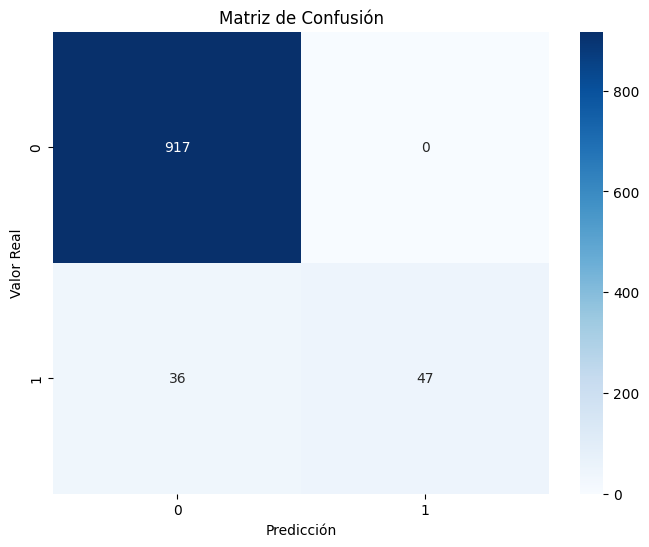

In [29]:
# Matriz de confusión.
# Importación de librerías.
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

# Matriz de confusión.
cm = confusion_matrix(y_test, y_pred)

# Gráfico.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

In [31]:
# Impresión de los registros anómalos reales y predichos por el modelo.
print(f"Registros anómalos reales: {sum(y_test == 1)}")
print(f"Registros anómalos predichos: {sum(y_pred == 1)}")

Registros anómalos reales: 83
Registros anómalos predichos: 47


In [32]:
# Obtención de probabilidades.
pd.DataFrame(pipe.predict_proba(X_test), columns=["0", "1"])

,0,1
0,0.963216,0.036784
1,0.963216,0.036784
2,0.963216,0.036784
3,0.000000,1.000000
4,0.963216,0.036784
...,...,...
995,0.963216,0.036784
996,0.963216,0.036784
997,0.963216,0.036784
998,0.963216,0.036784


In [43]:
# Importancias de atributos.
f_names = pipe.steps[0][1].get_feature_names_out()
f_importances = pipe.steps[1][1].feature_importances_
f_importances = list(map('{:.4f}'.format, f_importances))

pd.DataFrame(f_importances, index=f_names, columns=["Importancia"]).sort_values(by="Importancia", ascending=False)

,Importancia
numerical__Age,0.2786
passthrough__TransactionID,0.2296
numerical__Account Balance,0.2034
passthrough__Last Transaction Date,0.1539
categorical__Account Type_nan,0.1346
passthrough__Customer ID,0.0000
categorical__Gender_Female,0.0000
categorical__Transaction Type_Withdrawal,0.0000
categorical__Transaction Type_Transfer,0.0000
categorical__Transaction Type_Deposit,0.0000


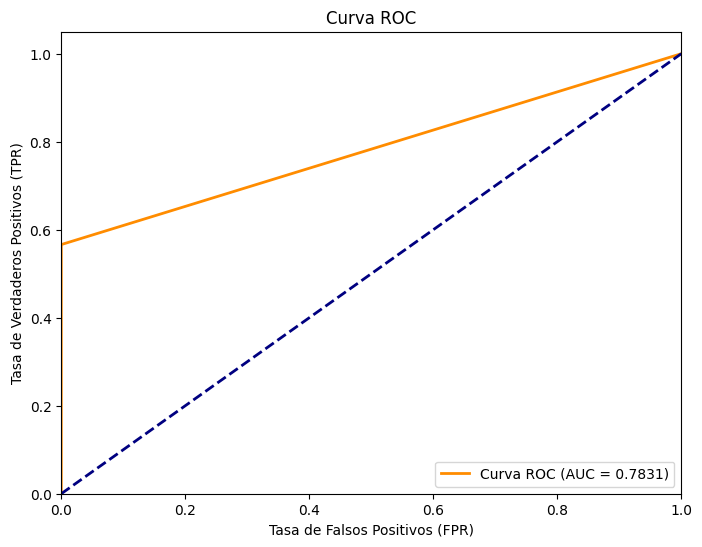

In [44]:
# Construcción de la curva ROC y cálculo del área bajo la curva.
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
auc = roc_auc_score(y_test, y_prob[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### 6. Comparación y selección de modelos utilizando GridSearch y Cross Validation

In [45]:
# Importación de librerias.
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

# Se prepara el espacio de búsqueda para el modelo de árboles de decisión.
param_grid_dt = {
    'clf': [DecisionTreeClassifier(random_state=42)],
    'clf__max_depth': [2, 5, 10, 20],
    'clf__min_samples_split': [2, 5, 10]
}

# Se prepara el espacio de búsqueda para el modelo SVM.
param_grid_svm = {
    'clf': [SVC(random_state=42)],
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf']
}

# Se combinan los espacios de búsqueda de ambos modelos.
param_grid = [
    param_grid_dt,
    param_grid_svm
]

# Creación del objeto imputer para reemplazar valores numéricos vacíos.
# NOTA: A pesar de las transformaciones realizadas, el dataset continua teniendo valores vacíos
# (np.nan) para los atributos numéricos, que no son transformados mediante col_transformer.
# Dado que el modelo de SVM no tolera valores faltantes, se utiliza un imputador, que en este
# caso utiliza la media para la imputación, pero podría estar sujeto al espacio de búsqueda de
# hiperparámetros.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [46]:
# Configuracion del pipeline con el transformador y un marcador reservado para la selección del clasificador.
pipe = Pipeline(steps=[('col_transformer', col_transformer),
                       ('col_imputer', imp),
                       ('clf', DecisionTreeClassifier()) # Marcador, es reemplazado automáticamente por GridSearchCV.
])

# Se crea el objeto de validación cruzada estratificado.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Se configura el objeto GridSearchCV.
grid_search = GridSearchCV(pipe, param_grid, cv=skf, scoring='accuracy', n_jobs=-1, verbose=1)

In [47]:
# Evaluación y selección sobre los datos de entrenamiento.
grid_search.fit(X_train, y_train)

# Obtención del mejor modelo según la búsqueda.
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [48]:
# Obtención del mejor modelo encontrado del espacio de búsqueda.

# Impresión de los mejores parámetros.
print("Mejor combinación de hiperparámetros encontrada: ", grid_search.best_params_)
print("Accuracy obtenido: ", grid_search.best_score_)

Mejor combinación de hiperparámetros encontrada:  {'clf': DecisionTreeClassifier(random_state=42), 'clf__max_depth': 20, 'clf__min_samples_split': 2}
Accuracy obtenido:  0.9945


In [49]:
# Evaluación del mejor modelo obtenido sobre los datos de prueba.
y_pred = best_model.predict(X_test)

In [50]:
# Cálculo de métricas.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Impresión.
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9910
Precision: 0.9744
Recall: 0.9157
F1-score: 0.9441


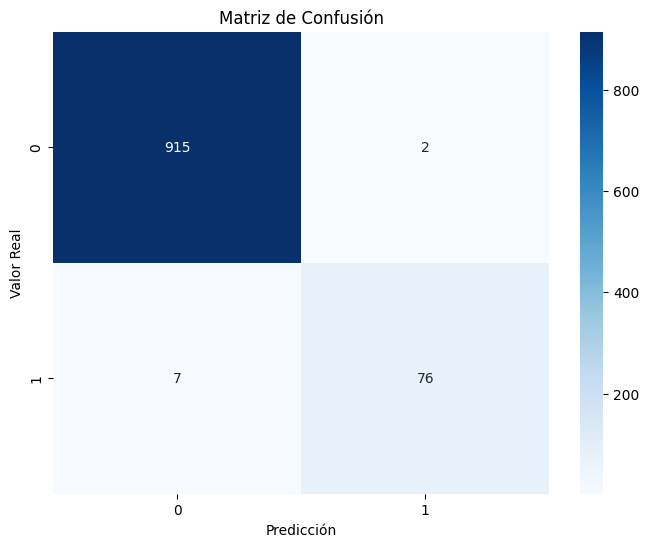

In [51]:
# Matriz de confusión.
# Importación de librerías.
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

# Matriz de confusión.
cm = confusion_matrix(y_test, y_pred)

# Gráfico.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

In [53]:
# Impresión de los registros anómalos reales y predichos por el modelo.
print(f"Registros anómalos reales: {sum(y_test == 1)}")
print(f"Registros anómalos predichos: {sum(y_pred == 1)}")

Registros anómalos reales: 83
Registros anómalos predichos: 78


In [54]:
# Obtención de probabilidades.
pd.DataFrame(best_model.predict_proba(X_test), columns=["0", "1"])

,0,1
0,1.000000,0.000000
1,1.000000,0.000000
2,0.990385,0.009615
3,0.000000,1.000000
4,0.999077,0.000923
...,...,...
995,0.999077,0.000923
996,1.000000,0.000000
997,1.000000,0.000000
998,1.000000,0.000000


In [56]:
# Importancias de atributos.
f_names = best_model.steps[0][1].get_feature_names_out()
f_importances = best_model.steps[2][1].feature_importances_
f_importances = list(map('{:.4f}'.format, f_importances))

pd.DataFrame(f_importances, index=f_names, columns=["Importancia"]).sort_values(by="Importancia", ascending=False)

,Importancia
passthrough__TransactionID,0.1554
passthrough__City,0.1179
categorical__Account Type_nan,0.1021
passthrough__Contact Number,0.0978
passthrough__Last Transaction Date,0.0869
passthrough__First Name,0.0723
categorical__Gender_nan,0.0578
passthrough__Customer ID,0.0572
passthrough__Last Name,0.0453
passthrough__Transaction Date,0.0424
